In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/encoded/Encoded Dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/encoded/Encoded Dataset.csv')

### Dropping Year

In [3]:
df.drop('year',axis=1,inplace=True)
df.drop('day',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)

### Seperating Feature and Target

In [4]:
x=df.drop('FWI',axis=1)
y=df['FWI']

### Separating Train and Test

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=10)

### Feature selection

In [6]:
abs(x_train.corr())

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,0.669720,0.334140,0.353265,0.677623,0.487571,0.389471,0.602026,0.467013,0.546279,0.283242
RH,0.669720,1.000000,0.204591,0.222707,0.649486,0.428679,0.266198,0.707446,0.383706,0.463607,0.401123
Ws,0.334140,0.204591,1.000000,0.128902,0.174288,0.006788,0.058934,0.004938,0.020047,0.098821,0.181108
Rain,0.353265,0.222707,0.128902,1.000000,0.566291,0.319280,0.312623,0.364699,0.327179,0.386251,0.035181
FFMC,0.677623,0.649486,0.174288,0.566291,1.000000,0.608838,0.520211,0.743021,0.600643,0.774048,0.248338
DMC,0.487571,0.428679,0.006788,0.319280,0.608838,1.000000,0.885047,0.690427,0.983489,0.591989,0.193025
DC,0.389471,0.266198,0.058934,0.312623,0.520211,0.885047,1.000000,0.536126,0.944205,0.500287,0.063488
ISI,0.602026,0.707446,0.004938,0.364699,0.743021,0.690427,0.536126,1.000000,0.664122,0.752023,0.280281
BUI,0.467013,0.383706,0.020047,0.327179,0.600643,0.983489,0.944205,0.664122,1.000000,0.589880,0.096093
Classes,0.546279,0.463607,0.098821,0.386251,0.774048,0.591989,0.500287,0.752023,0.589880,1.000000,0.231666


In [7]:
abs(x_train.corr()>.85)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,True,False,False,False,False,False,False,False,False,False,False
RH,False,True,False,False,False,False,False,False,False,False,False
Ws,False,False,True,False,False,False,False,False,False,False,False
Rain,False,False,False,True,False,False,False,False,False,False,False
FFMC,False,False,False,False,True,False,False,False,False,False,False
DMC,False,False,False,False,False,True,True,False,True,False,False
DC,False,False,False,False,False,True,True,False,True,False,False
ISI,False,False,False,False,False,False,False,True,False,False,False
BUI,False,False,False,False,False,True,True,False,True,False,False
Classes,False,False,False,False,False,False,False,False,False,True,False


### DMC is highly correlated with target compared to DC so we will drop DC 

In [8]:
abs(df.corr()['FWI'])

Temperature    0.566670
 RH            0.580957
 Ws            0.032368
Rain           0.324422
FFMC           0.691132
DMC            0.875864
DC             0.739521
ISI            0.922895
BUI            0.857973
FWI            1.000000
Classes        0.719216
Region         0.197102
Name: FWI, dtype: float64

### Dropping DC

In [9]:
x_train.drop('DC',axis=1,inplace=True)
x_test.drop('DC',axis=1,inplace=True)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().set_output(transform='pandas')
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [11]:
x_train_scaled

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Region
1,-0.822462,-0.132488,-0.961265,0.285553,-0.848998,-0.813599,-0.880024,-0.861632,-1.092141,-1.0
2,-1.649468,1.266318,2.298677,6.581784,-2.006709,-0.937544,-1.046416,-0.942913,-1.092141,-1.0
149,1.382887,-1.731122,-0.961265,-0.408100,1.031446,0.975851,1.663400,0.709790,0.915633,1.0
208,1.107219,-0.598756,-0.599049,-0.408100,0.931066,3.973762,1.259304,3.480098,0.915633,1.0
103,-0.822462,1.665976,-0.961265,-0.408100,-0.407328,-0.929798,-0.832484,-0.875179,-1.092141,-1.0
...,...,...,...,...,...,...,...,...,...,...
64,0.555881,0.400391,-0.961265,-0.408100,0.529548,-0.495991,-0.166915,-0.570377,0.915633,-1.0
15,-0.822462,1.732586,-0.961265,-0.034595,-2.742825,-0.999516,-1.117727,-0.976780,-1.092141,-1.0
228,0.280213,-2.463830,-0.961265,-0.408100,1.125133,0.511059,2.257658,0.391441,0.915633,1.0
125,-0.546793,0.067342,-0.599049,-0.408100,0.154798,-0.728388,-0.594780,-0.746485,-1.092141,1.0


In [12]:
x_train_scaled.shape

(182, 10)

In [13]:
x_test.shape

(61, 10)

### Box Plot to understand Effect of Standard Scalar

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_33/3723510248.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after Scaling')

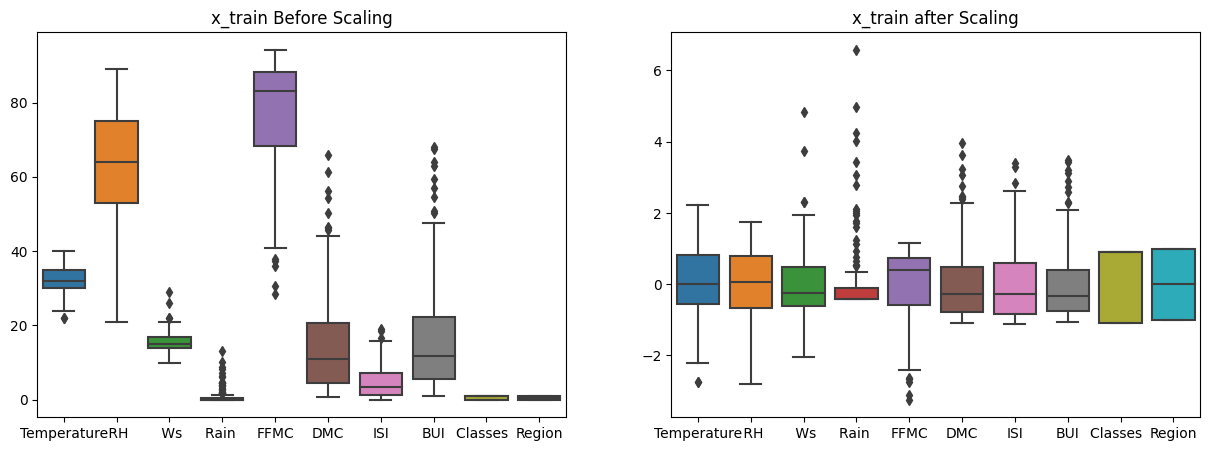

In [15]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after Scaling')

### Model traning

In [16]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error

### Lasso

In [17]:
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

r2 score 0.9697267024993677
Mae 0.8765247897683921


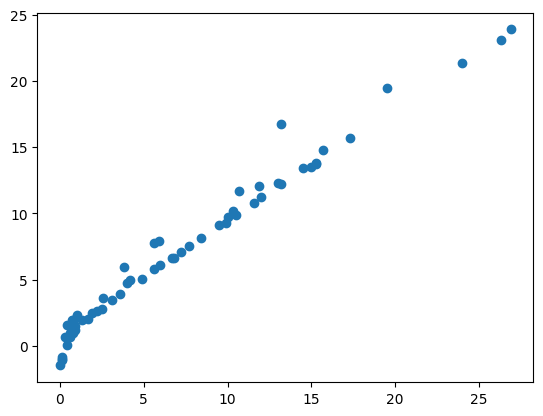

In [18]:
print('r2 score',score)
print('Mae',mae)
plt.scatter(y_test,y_pred)

### Lasso CV

In [19]:
lasso_cv=LassoCV(cv=5,n_jobs=-1)
lasso_cv.fit(x_train_scaled,y_train)
y_pred=lasso_cv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

r2 score 0.9713957387895056
Mae 0.7683347244664017


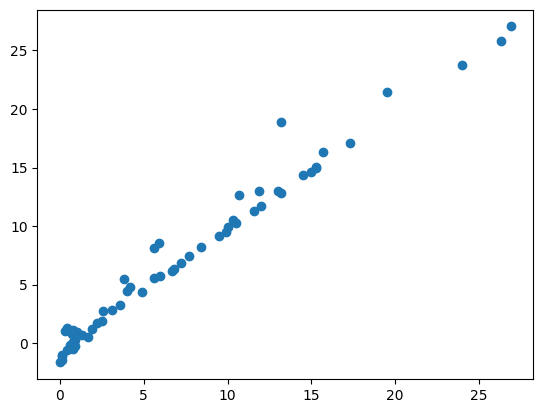

In [20]:
print('r2 score',score)
print('Mae',mae)
plt.scatter(y_test,y_pred)

### Ridge Regression Model


In [21]:
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

r2 score 0.9710038714080658
Mae 0.7792323615425111


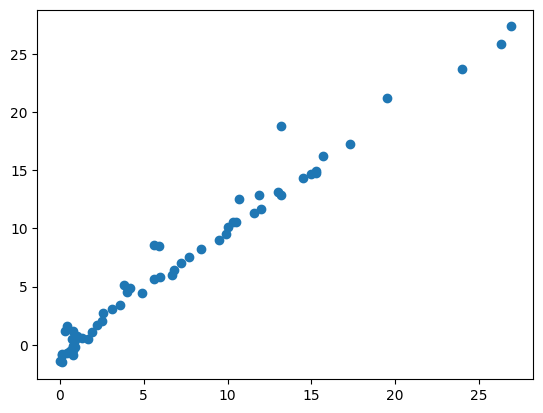

In [22]:
print('r2 score',score)
print('Mae',mae)
plt.scatter(y_test,y_pred)

### Ridge CV

In [23]:
ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(x_train_scaled,y_train)
y_pred=ridge_cv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

r2 score 0.9710038714080658
Mae 0.7792323615425111


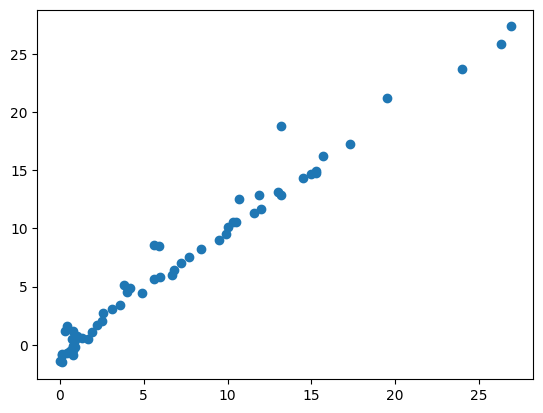

In [24]:
print('r2 score',score)
print('Mae',mae)
plt.scatter(y_test,y_pred)

In [25]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elastic Net

In [26]:
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

r2 score 0.9201329287421195
Mae 1.4669352307005146


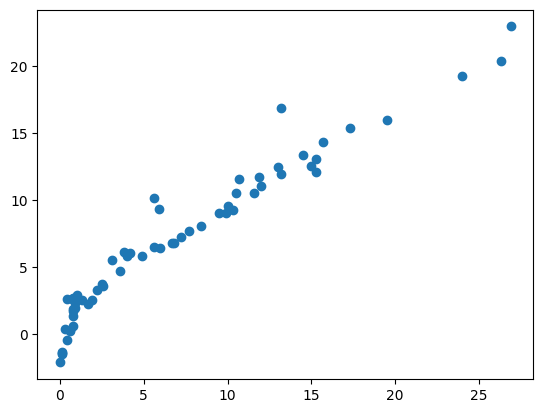

In [27]:
print('r2 score',score)
print('Mae',mae)
plt.scatter(y_test,y_pred)

### ElasticNet Cv

In [28]:
elastic_cv=ElasticNetCV()
elastic_cv.fit(x_train_scaled,y_train)
y_pred=elastic_cv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

r2 score 0.9716857607544286
Mae 0.7606828411765304


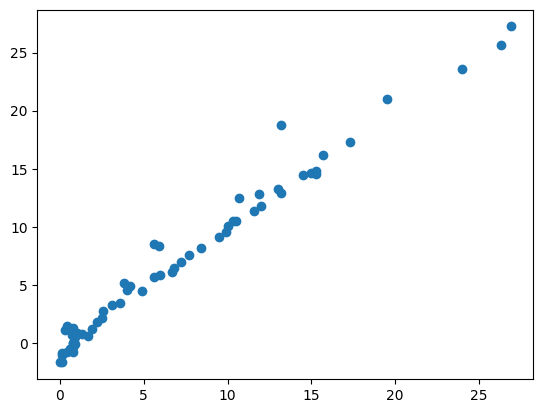

In [29]:
print('r2 score',score)
print('Mae',mae)
plt.scatter(y_test,y_pred)

### Saving Model with Pickle

In [30]:
import pickle
pickle.dump(elastic_cv,open('model.pkl','wb'))

In [31]:
pickle.dump(scaler,open('scaler.pkl','wb'))